In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

%pylab inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Populating the interactive namespace from numpy and matplotlib
./kaggle/input\polyai-ml-a20\data_test.npz
./kaggle/input\polyai-ml-a20\data_train.npz
./kaggle/input\polyai-ml-a20\sampleSubmission.csv


In [18]:
data_train_file = np.load("./kaggle/input/polyai-ml-a20/data_train.npz")
data_test_file = np.load("./kaggle/input/polyai-ml-a20/data_test.npz")

In [19]:
print(data_train_file.files)
print(data_test_file.files)

['data', 'labels', 'metadata']
['data', 'metadata']


In [20]:
data_train_file['labels']

array([14,  5,  5, ..., 13, 10, 10])

In [25]:
images_train = data_train_file['data']
labels_train = data_train_file['labels']
labels_metadata_train = data_train_file['metadata'].astype(str)
images_test = data_test_file['data']
labels_metadata_test = data_test_file['metadata'].astype(str)
image0 = images_train[65]
label0 = labels_train[65]

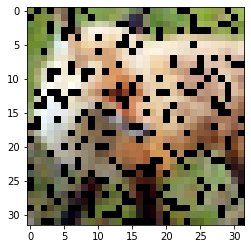

Class: 12
Name: medium_mammals


In [27]:
plt.imshow(image0)
plt.show()
print("Class:", label0)
print("Name:", labels_metadata_train[label0])

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [41]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(32, 32, 3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


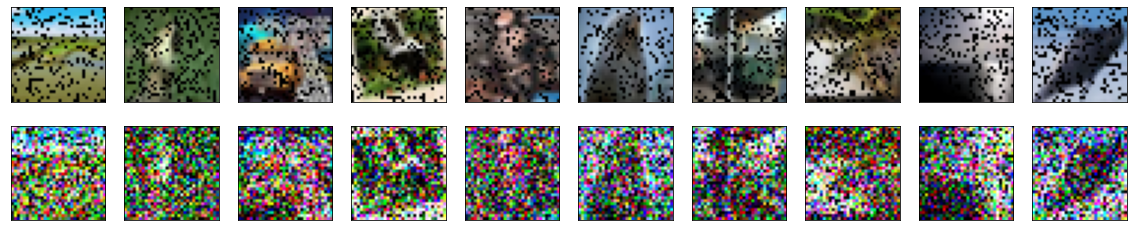

In [43]:
# Normalize and reshape the data
train_data = preprocess(images_train)
test_data = preprocess(images_test)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
input = layers.Input(shape=(28, 28, 3))

# Encoder
x = layers.Conv2D(96, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(96, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(96, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(96, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
